In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Look into the scenario and the data
---
> **The Scenario** 
```
Twitch is experiencing a phenomenon in which new streamers continue to leave after joining.
To solve this issue, Twitch plans to design a fostering program to help the growth of new streamers.
To run and test this program, I have collected the data from the top 1,000 streamers over the past year.
I will plan the contents of the fostering program through an analysis of what factors can increase the number of followers.
```  

> **Look into the data**

|Column|Description|
|:---|:---|
|Channel|Channel Name|
|Watch time(Minutes)|Total watching time|
|Stream time(minutes)|Total streaming time|
|Peak viewers|Maximum number of viewers|
|Average viewers|Average number of viewers|
|Followers|number of followers|
|Followers gained|Increased number of followers|
|Views gained|Increased number of viewers|
|Partnered|Partner streamer|
|Mature|Audience rating (adult)|
|Language|Language|

In [3]:
# read the data
import pandas as pd

df = pd.read_csv('./twitch_data.csv')
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


## **Solving the problem process**
---
> **Problem Definition**

```
▶ Problem Situation : Continuous departure of new entrant streamers
▶ Risks : Platform market stagnation, causing existing users deviation by absence of new content and streamers and profit structure worsening
```  

> **Expected effectiveness**

```
▶ Cultivate new entry streamers and support their growth through proper care
▶ Increase loyalty to existing users and increase new viewers based on rich content
▶ Platform size growth and increased operating profit
```

> **Solution**

```
▶ Analyze data from top streamers to identify key factors in increasing followers
▶ Set the column 'Followers gained' as a target value and extract important features through Regression model
▶ Plan and operate a new fostering program using the extracted features
```

> **Performance Measurement**  

```
▶ Establish and monitor indicators before and after the operation of the new fostering program
▶ AS-is : The rate of departure of new streamers before running the fostering program (%)
▶ To-be : The rate of departure of new streamers after running the fostering program (%)
▶ Measurement of the departure rate (%) gap before and after the fostering program operation
```

> **Model Operation**  

```
▶ One-time modeling and extraction of critical features based on the data collected over a year
▶ Establishment and operation of new entry streamer development plan using the extracted important features
```

## **🥉Session 1**  
**┗ Data Info check**  
---

### · Data Preprocessing  
---
> **Check basic information of collected data** 

```
* Steps to read the data and understand the overall basic information, including the shape, type, and duration of the data
* Check the basic info and do data preprocessing at the same time

  (1) Check Data shape 
  (2) Check Data type
  (3) Check Null value
  (4) Check duplicate data
  (5) Check outlier
```

In [4]:
# Check data shape
df.shape

(1000, 11)

In [5]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [6]:
# Check Null value
print(df.isnull().sum())

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64


In [7]:
# Check for duplicate data
df.duplicated().value_counts()

False    1000
dtype: int64

In [8]:
# Check Zero ratio for each column
list_of_df = []

for i in df.columns :
 loof_df = pd.DataFrame({'val' : [i],
              'zero_cnt': df[df[i] == 0].count()[0]})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df)
df_merge.sort_values(by=['zero_ratio'], ascending = False)

,val,zero_cnt,zero_ratio
9,Mature,770,0.770
8,Partnered,22,0.022
0,Channel,0,0.000
1,Watch time(Minutes),0,0.000
2,Stream time(minutes),0,0.000
3,Peak viewers,0,0.000
4,Average viewers,0,0.000
5,Followers,0,0.000
6,Followers gained,0,0.000
7,Views gained,0,0.000


Not delete 'Mature' column because it is a bool type data and not over 90%

In [9]:
# Change columns name
df.columns = ['Channel', 'Watch_time(m)', 'Stream_time(m)',
       'Peak_viewers', 'Average_viewers', 'Followers', 'Followers_gained',
       'Views_gained', 'Partnered', 'Mature', 'Language']
df.head()

,Channel,Watch_time(m),Stream_time(m),Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


### · Data EDA
---
> **Understand the basic info of the collected data** 

```
* Explore Target data 
* Explore numeric and categorical data
```

In [11]:
import numpy as np
import pandas as pd
# Split numeric, categorical value
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)


print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['Watch_time(m)', 'Stream_time(m)', 'Peak_viewers', 'Average_viewers', 'Followers', 'Followers_gained', 'Views_gained', 'Partnered', 'Mature']
categorical_list: ['Channel', 'Language']


In [12]:
# Check numerical_list value unique (1)
list_of_df = []

for i in numerical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,Watch_time(m),1000
4,Followers,1000
6,Views_gained,1000
5,Followers_gained,998
2,Peak_viewers,990
1,Stream_time(m),962
3,Average_viewers,926
7,Partnered,2
8,Mature,2


1. Check if there is any Null value
2. Check if the Zero ratio is too high
3. Check if a column is full of one value

In [13]:
# Check categoical_list value unique
print("Channel:", df['Channel'].nunique())
print("Language:", df['Language'].nunique())

Channel: 1000
Language: 21


In [14]:
df['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

In [15]:
df['Language'].value_counts(normalize = True)

English       0.485
Korean        0.077
Russian       0.074
Spanish       0.068
French        0.066
Portuguese    0.061
German        0.049
Chinese       0.030
Turkish       0.022
Italian       0.017
Polish        0.012
Thai          0.011
Japanese      0.010
Czech         0.006
Arabic        0.005
Hungarian     0.002
Slovak        0.001
Other         0.001
Greek         0.001
Finnish       0.001
Swedish       0.001
Name: Language, dtype: float64

## **🥈Session 2**  
**┗ Data Readiness Check & Feature Engineering**  
---


### · Data Readiness Check
---
> Check to see if the level of data you have can fix the problem

```
(1) Make Target label
(2) Check Target Ratio
(3) Determine the Analysis Direction
```

In [16]:
# Check distribution for the target value
df['Followers_gained'].describe()

count    1.000000e+03
mean     2.055185e+05
std      3.399137e+05
min     -1.577200e+04
25%      4.375825e+04
50%      9.835200e+04
75%      2.361308e+05
max      3.966525e+06
Name: Followers_gained, dtype: float64

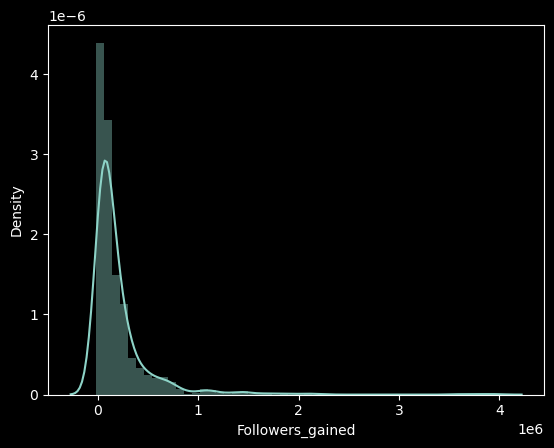

In [17]:
# ▶ Use Plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Followers_gained']);

In [18]:
df[df['Followers_gained'] < 0]

,Channel,Watch_time(m),Stream_time(m),Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
499,Amaz,235255500,84525,12652,2764,915023,-5405,4237993,True,False,English
656,TSM_TheOddOne,181908120,188445,4363,913,864087,-15772,6370949,True,False,English
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean


In [19]:
df[df['Followers_gained'] == df['Followers_gained'].max()]

,Channel,Watch_time(m),Stream_time(m),Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [20]:
# sample col eda (1)
df.groupby('Mature')['Followers_gained'].mean()

Mature
False    222787.207792
True     147706.017391
Name: Followers_gained, dtype: float64

In [21]:
# sample col eda (2)
df.groupby('Partnered')['Followers_gained'].mean()

Partnered
False    143304.181818
True     206918.038855
Name: Followers_gained, dtype: float64

```
* No significant difficulty in progressing the analysis
* If additional collection is possible, request to collect category information by channels
```

### · Feature Engineering
---

> #### **└ Numerical features** 

In [22]:
# Select only numeric features
numerical_list.remove('Partnered')
numerical_list.remove('Mature')
numerical_list

['Watch_time(m)',
 'Stream_time(m)',
 'Peak_viewers',
 'Average_viewers',
 'Followers',
 'Followers_gained',
 'Views_gained']

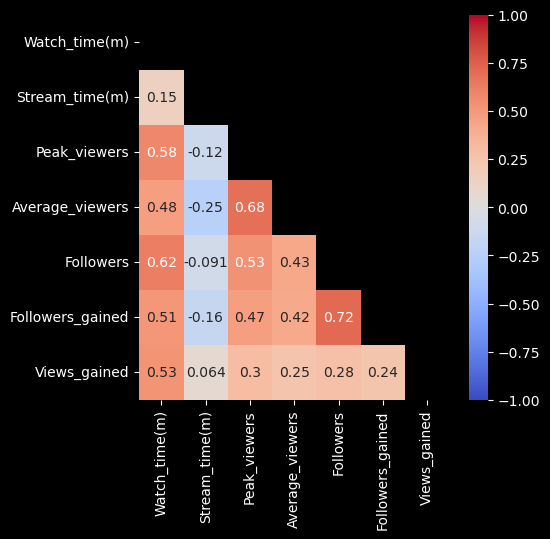

In [23]:
# heatmap plot
import seaborn as sns
# Show the correlation
df_pair = df[numerical_list]
mask = np.triu(np.ones_like(df_pair.corr(), dtype=np.bool))
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = mask);
plt.gcf().set_size_inches(5, 5)

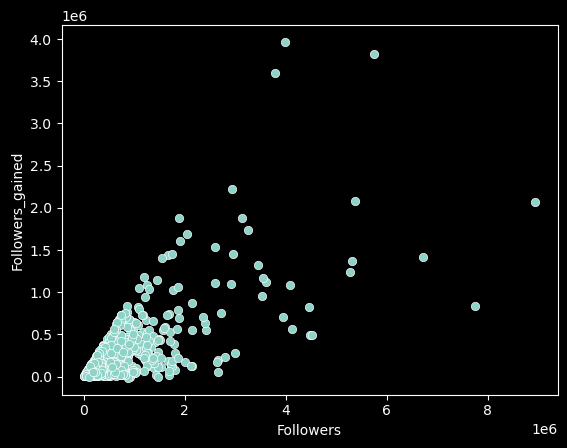

In [24]:
# scatter plot
sns.scatterplot(data = df, x='Followers', y='Followers_gained');

In [25]:
# Binning
df_mart = df.copy()
val = 'Followers'

quantile  = df_mart[val].quantile(q=list(np.arange(0.05,1,0.05)), interpolation = 'nearest')

# Reset the group 
df_mart['grp'] = 0

# Seperate it beased on 40%, 75%
for i in  range(len(df_mart[val])) :
  if df_mart.loc[i, val] <= quantile.iloc[7] : # 40%
    df_mart.loc[i, 'grp'] = 1
  elif df_mart.loc[i, val] <= quantile.iloc[14] : # 75%
    df_mart.loc[i, 'grp'] = 2
  else : df_mart.loc[i, 'grp'] = 3

In [26]:
# Check the binning
display(df_mart['grp'].value_counts())
display(df_mart['grp'].value_counts(normalize=True))

1    401
2    349
3    250
Name: grp, dtype: int64

1    0.401
2    0.349
3    0.250
Name: grp, dtype: float64

In [27]:
# Check the target based on the groups
pd.options.display.float_format = '{:.5f}'.format
df_mart.groupby('grp')['Followers_gained'].mean()

grp
1    62752.73566
2   153171.04298
3   507591.97200
Name: Followers_gained, dtype: float64

Can see 'followers' affects on the target 'Followers_gained' significantly

<Axes: xlabel='Stream_time(m)', ylabel='Followers_gained'>

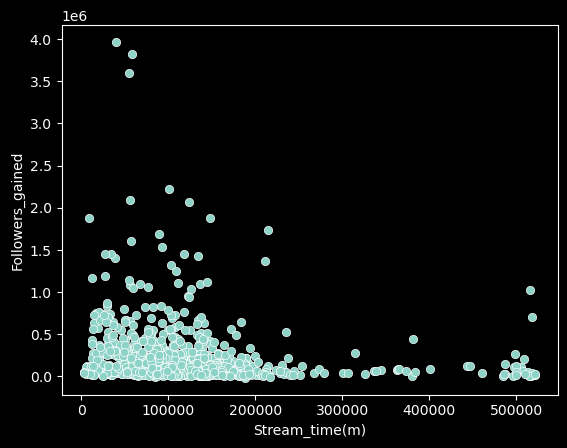

In [28]:
# scatter plot
sns.scatterplot(data = df, x='Stream_time(m)', y='Followers_gained')

In [29]:
# Binning
df_mart = df.copy()
val = 'Stream_time(m)'

quantile  = df_mart[val].quantile(q=list(np.arange(0.05,1,0.05)), interpolation = 'nearest')
# quantile

# Resre the group 
df_mart['grp'] = 0

# Seperate it beased on 40%, 75%
for i in  range(len(df_mart[val])) :
  if df_mart.loc[i, val] <= quantile.iloc[7] : # 40%
    df_mart.loc[i, 'grp'] = 1
  elif df_mart.loc[i, val] <= quantile.iloc[14] : # 75%
    df_mart.loc[i, 'grp'] = 2
  else : df_mart.loc[i, 'grp'] = 3

In [30]:
# Check the binning
display(df_mart['grp'].value_counts())
display(df_mart['grp'].value_counts(normalize=True))

1    402
2    348
3    250
Name: grp, dtype: int64

1   0.40200
2   0.34800
3   0.25000
Name: grp, dtype: float64

In [31]:
# Check the target based on the groups
df_mart.groupby('grp')['Followers_gained'].mean()

grp
1   281668.55970
2   175777.44828
3   124468.88400
Name: Followers_gained, dtype: float64

> #### **└ Categorical features** 

In [32]:
df.head()

,Channel,Watch_time(m),Stream_time(m),Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [33]:
# Switch the bool type data into 1, 0
df['Partnered'] = np.where(df['Partnered'] == True , 1, 0)
df['Mature'] = np.where(df['Mature'] == True , 1, 0)
df[['Partnered', 'Mature']]

,Partnered,Mature
0,1,0
1,1,0
2,1,1
3,1,0
4,1,0
...,...,...
995,1,0
996,1,0
997,1,0
998,1,0


,Partnered,mean
0,0,143304.18182
1,1,206918.03885


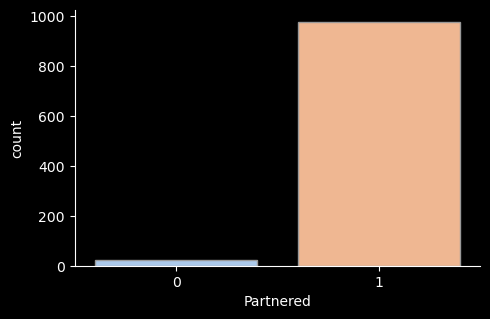

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="Partnered", kind="count",palette="pastel", edgecolor=".6",data=df);
# plt.xticks(rotation=-20)
plt.gcf().set_size_inches(5, 3)

# ▶ sample col eda
eda_df = df.groupby('Partnered')['Followers_gained'].agg(mean =('mean')).reset_index()
display(eda_df)

,Mature,mean
0,0,222787.20779
1,1,147706.01739


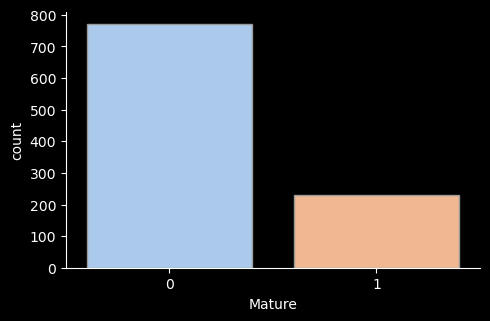

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="Mature", kind="count",palette="pastel", edgecolor=".6",data=df);
# plt.xticks(rotation=-20)
plt.gcf().set_size_inches(5, 3)

# ▶ sample col eda
eda_df = df.groupby('Mature')['Followers_gained'].agg(mean =('mean')).reset_index()
display(eda_df)

## **🥇Session 3**  
**┗ Modeling Process**  
---

### · Modeling
---
> **Preparing Data** 

```
* Models recognize only numeric data (※ must do encoding categorical data)
* To do modeling, split features and Y which will be predicted
* Split Train and Test data set for training and predicting
* Encode categorical value
```
> **Model Selection (Regression)** 

```
* Linear Regression model (Ridge, Lasso, Elastic Net)
* Nonlinear Regression model (polynomial, log)
* Tree type Regression model
  - bagging Ensemble (Randomforest)
  - boosting Ensemble (lightGBM)
```


> **Train Model** 

```
* Train the models that are selected in step 'Model Selection' and record the performance
* With the same data set and situation, compare the performance with the same comparison metrics
```

> #### **└ Prepare the data** 

In [34]:
df.head()

,Channel,Watch_time(m),Stream_time(m),Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


In [35]:
# Split Feature (X) and Target (Y) to train the model
from sklearn.model_selection import train_test_split

X = df.drop(['Channel', 'Followers_gained', 'Language'], axis=1)
Y = df['Followers_gained']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(700, 8)
(700,)
(300, 8)
(300,)


> #### **└ Linear Regression** 

In [36]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [37]:
# Train Model
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

LR = LinearRegression()
LR.fit(x_train_sc, y_train)

LinearRegression()

In [38]:
from sklearn import metrics

# Check the prediction and performance
y_pred_train = LR.predict(x_train_sc)
y_pred_test = LR.predict(x_test_sc)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

0.5537554503631802
0.4645473310557856


In [39]:
# Reduce performance to the maximum for train and test set to avoid overfitting
from sklearn.metrics import roc_auc_score

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

[Train]
Mean Absolute Error: 123528.99942276085
Mean Squared Error: 59046424410.06445
Root Mean Squared Error: 242994.7003744412
------------------------------------------
[Test]
Mean Absolute Error: 114201.3287917701
Mean Squared Error: 40634888851.96252
Root Mean Squared Error: 201580.97343738202


In [40]:
# Create an empty DataFrame for performance comparison across multiple models
df_comparison = pd.DataFrame(columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test'])
df_comparison.columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test']
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test


In [41]:
# Add the performance of LR model
import sklearn.metrics as metrics

lr_re = pd.DataFrame({ 'model' : ['LR'],
                      'r2_train' :  metrics.r2_score(y_train,y_pred_train),
                      'r2_test' : metrics.r2_score(y_test,y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),}
                    )

df_comparison = df_comparison.append(lr_re)
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.55376,0.46455,242994.70037,201580.97344


> #### **└ Random Forest** 

In [42]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(x_train, y_train)

# Check the prediction and performance
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

0.9407442907981014
0.5148292883788178


In [43]:
# Reduce performance to the maximum for train and test set to avoid overfitting
from sklearn.metrics import roc_auc_score

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

[Train]
Mean Absolute Error: 43159.87024285714
Mean Squared Error: 7840628545.720567
Root Mean Squared Error: 88547.32376373984
------------------------------------------
[Test]
Mean Absolute Error: 110273.19296666665
Mean Squared Error: 36819048786.94006
Root Mean Squared Error: 191882.9038422654


In [44]:
# ▶ BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestRegressor(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    return np.mean(scores)
    
    
def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 200),
                                                  'maxDepth': (2, 4)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10)
    print(clfBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.4681    | 2.567     | 145.2     |
| 2         | 0.4715    | 2.414     | 119.2     |
| 3         | 0.4787    | 3.031     | 162.5     |
| 4         | 0.4805    | 3.22      | 165.5     |
| 5         | 0.4873    | 3.698     | 117.8     |
| 6         | 0.453     | 3.756     | 117.9     |
| 7         | 0.4865    | 3.407     | 146.9     |
| 8         | 0.4748    | 2.617     | 130.1     |
| 9         | 0.5062    | 3.69      | 165.9     |
| 10        | 0.4652    | 3.672     | 157.9     |
| 11        | 0.4804    | 3.447     | 163.5     |
| 12        | 0.4649    | 2.34      | 199.0     |
| 13        | 0.4798    | 2.105     | 124.9     |
| 14        | 0.4753    | 3.668     | 141.9     |
| 15        | 0.4771    | 3.389     | 163.2     |
[{'target': 0.46808658605016784, 'params': {'maxDepth': 2.5668721259385676, 'n_estimators': 145.15451103192515}}, {'target': 0.47151436477977365, 'par

In [45]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

rfc = RandomForestRegressor(n_estimators=110, max_depth = 3, random_state= 1121)
rfc.fit(x_train, y_train)

# Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)


rfc_re = pd.DataFrame({ 'model' : ['RFC(BO)'],
                      'r2_train' :  metrics.r2_score(y_train,y_pred_train),
                      'r2_test' : metrics.r2_score(y_test,y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),}
                    )
# rfc_re

df_comparison = df_comparison.append(rfc_re)
df_comparison.reset_index(drop=True, inplace = True)

In [46]:
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.55376,0.46455,242994.70037,201580.97344
1,RFC(BO),0.77345,0.51881,173138.84436,191094.68154


> #### **└ LightGBM** 

In [47]:
# lightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

LGBM = lgbm.LGBMRegressor()
LGBM.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 7
[LightGBM] [Info] Start training from score 209455.260000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor()

In [48]:
# Prediction
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

0.8589210974090107
0.499980144446457


In [49]:
# AUC
print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

[Train]
Mean Absolute Error: 56206.90841881716
Mean Squared Error: 18667353504.873756
Root Mean Squared Error: 136628.52376013494
------------------------------------------
[Test]
Mean Absolute Error: 112872.16191356808
Mean Squared Error: 37945933287.1668
Root Mean Squared Error: 194797.15934059923


In [50]:
def lgb_evaluate(n_estimators, maxDepth):
    clf = LGBMRegressor(
        learning_rate=0.01,
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    return np.mean(scores)
    
def bayesOpt(train_x, train_y):
    lgbBO = BayesianOptimization(lgb_evaluate, {                                               
                                                'n_estimators': (100, 200),
                                                'maxDepth': (2, 4)  
                                               })
    lgbBO.maximize(init_points=5, n_iter=10)
    print(lgbBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 7
[LightGBM] [Info] Start training from score 206766.008929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [51]:
# ▶ lightGBM
from lightgbm import LGBMRegressor

# ▶ setting the parameters
LGBM = LGBMRegressor(learning_rate=0.01, n_estimators=200, max_depth=4, random_state=1234)
LGBM.fit(x_train, y_train)


# Predicton
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

lgbm_re = pd.DataFrame({ 'model' : ['LGBM(BO)'],
                      'r2_train' :  metrics.r2_score(y_train,y_pred_train),
                      'r2_test' : metrics.r2_score(y_test,y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),}
                    )
# lgbm_re
df_comparison = df_comparison.append(lgbm_re)
df_comparison.reset_index(drop=True, inplace = True)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 7
[LightGBM] [Info] Start training from score 209455.260000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [52]:
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.55376,0.46455,242994.70037,201580.97344
1,RFC(BO),0.77345,0.51881,173138.84436,191094.68154
2,LGBM(BO),0.61932,0.52051,224433.59272,190755.77990


### · Modeling evaluation
---
> **Evaluate the performance of all the models** 

```
* After Hyper-parameter tunning, Compare the performance of all the models
```

In [53]:
df_comparison.style.background_gradient(cmap='coolwarm', low=1)

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.553755,0.464547,242994.700374,201580.973437
1,RFC(BO),0.773448,0.518807,173138.844361,191094.681539
2,LGBM(BO),0.619324,0.520512,224433.592720,190755.779895


> **Interpretation** 

```
* About Regression, the higher R2 and the lower RMSE, the better the performance
* LGBM(BO)'s R2 is the highest on the test set basis
* LGBM(BO)'s Loss(RMSE) is the lowest on the test set basis
* Select LGBM(BO)
```

### · Summary
---
> **Interpret the model and build an operation** 

```
* Explore the significant features of the selected model
```

> #### **└ Interpret the model** 

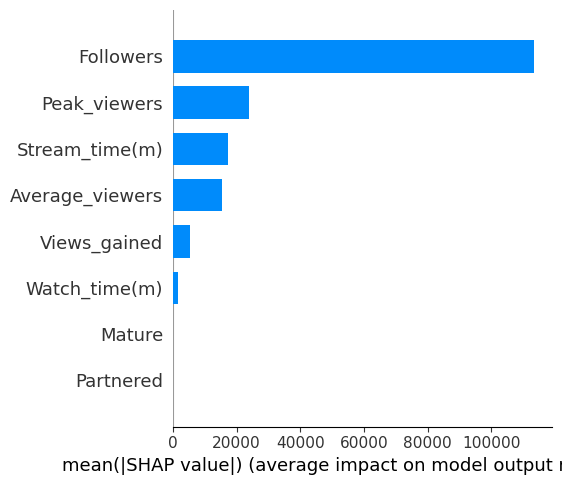

In [55]:
import shap
plt.style.use(['default'])

shap.initjs()
# LGBM shap
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar", show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

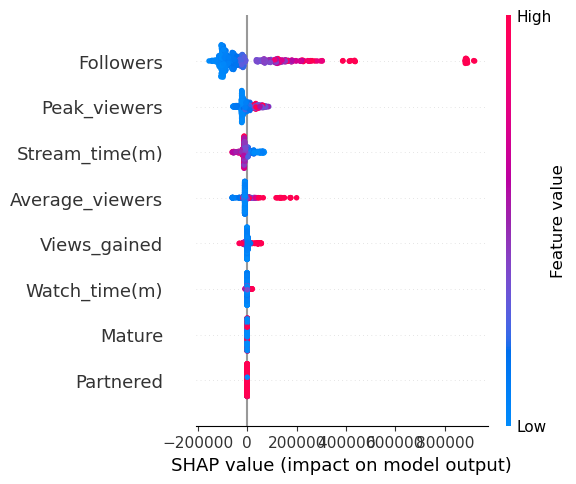

In [56]:
# LGBM shap global
shap.initjs()
shap.summary_plot(shap_values, x_train, show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

```
As a result, to help the fostering program run successfully, we can give some advice as following;
1. Having many followers helps a lot to gain new followers.
2. It shows that when the number of 'Peak_viewers' is high, the number of 'Followers_gained' is increasing as well, so streamers can gain new followers by introducing interesting content that can be a hot topic to increase the number of 'Peak_viewers'.
3. 'Stream_time' and 'Followers_gained' show a negative correlation. So do not let the streaming time take too long, and instead, support the streamers to produce the content mentioned earlier.
```

In [58]:
# LGBM shap local
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1] , x_train.iloc[1,:])

In [59]:
x_train.iloc[1,:]

Watch_time(m)      156004485
Stream_time(m)         25140
Peak_viewers          141406
Average_viewers         6728
Followers             143916
Views_gained         3300371
Partnered                  1
Mature                     0
Name: 792, dtype: int64